In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline
import statsmodels.api as sm

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv('/Users/hamadwaheed/Desktop/churn_clean.csv')
df_copy1 = df
df_copy2 = df_copy1
df_copy3 = df_copy2
df_copy4 = df_copy3
df_copy5 = df_copy4
df_copy6 = df_copy5
df_copy7 = df_copy6

In [4]:
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


# Part I: Research Question

## A.  Describe the purpose of this data analysis by doing the following:  

1.    A common pattern in modern day internet and phone companies is high Customer churn. Which means the turnover rate. Consumers move to compaies with better packages and more reliable services. In this highly competitive industry, we want to increase tenure rate and decrese churn rate. The reason we are talking about Churn is because our reserach question emanates from the idea of churn. We want to know what variables contribute most to tenure, becuase a longer tenure equates to a smaller churn rate. Our research question is, just like how light, water, and clean air in different combinations contribute to plant growth, what combination of variables within this dataset contribute to a longer tenure?   
      
2.   The objectives or goals of this project: 
     *   estimate an increased life expectancy of costumer's contract with the company: i.e predict whether a certain combination of variables can increase the length of tenure, becuase this will in turn decrease churn.

# Part II: Method Justification

1. Mulitple linear regression is a machine learning algorithm capable of outputting predictor values from input variables. It works by using explanatory or input variables, which can be continious or categorical, to determine a relationship to the output value. It used in predicting continous variable (Tenure in our case). The key assumptions of Muliptle Linear Regression are:
   * A linear relationship between indicator and output variables
   * No correlation between input variables
   * Variance when it comes to residuals
   * Multivariate Normality
   
2. Our analysis is carried out using python because of its; 
   * Faster Development and Processing   
   * Powerful Packages
   * Better Data Visualisation   
3. Multiple linear regession is an appropriate technique to use because we can see the effect of multiple x variables and how they impact the dependent Y variable. We also want to see the strength of the relationship between the variables. A company can take into consideration whether there is a strong relationship between variables when predicting what type of packages or products to offer. There will be stronger relationships with certain variables, and we want to find out which ones those are.

To prepare the data we will start by checking if it is clean and if it has any null points. We will also encode catergorical variables as dummy variables an standardize them to use them in the model. we will also normalize our data and use labelencoder for our pre-processing. we will do this to create an OLS model after our regression model. From there we will utilize the output p-values as selection criteria for reduction.

In [5]:
print('Dimensionality of the data is {}'.format(df.shape))  # .shape returns a tupel
print('The data set has {} cases.'.format(df.shape[0]))     # we can also index the elements of that tupel
print('The total number of elements is {}.'.format(df.size))
df_copy1.info()

Dimensionality of the data is (10000, 50)
The data set has 10000 cases.
The total number of elements is 500000.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job       

In [6]:
df_copy1.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,26292.500000,35.341828,-97.082813,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141369,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [7]:
df_copy1_null =df.isnull().sum(); pr=df.isnull().sum()/df_copy1.shape[0]
Nan=pd.concat([df_copy1_null,round(pr, 2)], axis=1, keys=["Total of missing values" ,"pourcentage (%)"]) ; Nan 

,Total of missing values,pourcentage (%)
CaseOrder,0,0.0
Customer_id,0,0.0
Interaction,0,0.0
UID,0,0.0
City,0,0.0
State,0,0.0
County,0,0.0
Zip,0,0.0
Lat,0,0.0
Lng,0,0.0


### The data is clean and does not have any missing rows or values, we can proceed with our univariate and bivariate trends

#### The Target Variable

<function tuple.index(value, start=0, stop=9223372036854775807, /)>

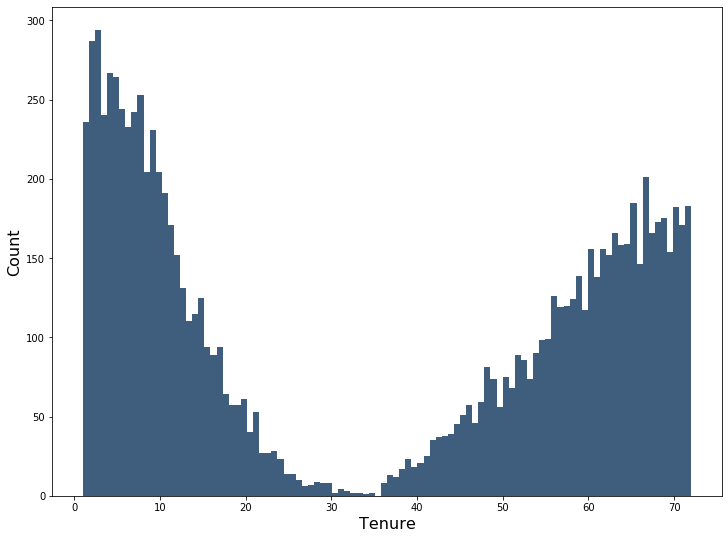

In [8]:

plt.figure(figsize=(12, 9)) 
plt.xlabel("Tenure", fontsize=16)  
plt.ylabel("Count", fontsize=16)
p=plt.hist(df_copy1.Tenure.values ,  color="#3F5D7D", bins=100, )
p.index

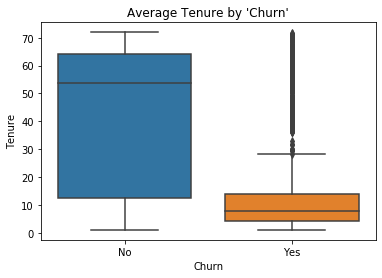

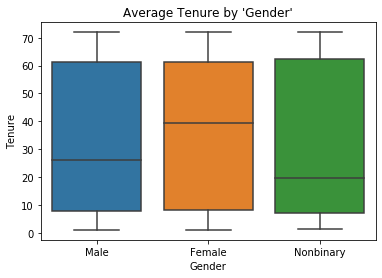

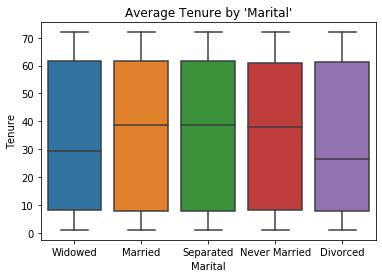

In [9]:
ax=sns.boxplot(x='Churn',y='Tenure',data=df_copy1)
ax.set_title("Average Tenure by 'Churn'")
ax.set_ylabel('Tenure')
plt.show() 

ax=sns.boxplot(x='Gender',y='Tenure',data=df_copy1)
ax.set_title("Average Tenure by 'Gender'")
ax.set_ylabel('Tenure')
plt.show() 


ax=sns.boxplot(x='Marital',y='Tenure',data=df_copy1)
ax.set_title("Average Tenure by 'Marital'")
ax.set_ylabel('Tenure')
plt.show() 

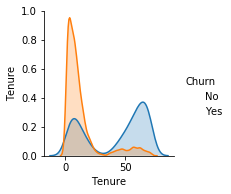

In [10]:
f=df_copy1[['Tenure','Churn']]
f.head()
sns.pairplot(f, hue='Churn')

# Visualization Preperation End

In [11]:
df_copy1.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


In [12]:
df_copy1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

# Initial Model

In [13]:
#### Pre-Processing: Creating Dummy Variables

We will exlude city, county, state, and timezone because the dummy variables are 400 pages long and it will dilute our data

In [14]:
df_copy2 = pd.get_dummies(df, columns=['StreamingTV','StreamingMovies','Gender','PaymentMethod','InternetService','Contract','Area','Techie','Port_modem','Tablet','Phone','Multiple','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','PaperlessBilling','Marital'],drop_first=True).head(5)

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split #to create validation data set
from sklearn import metrics

X=df_copy2.drop(["Tenure","Interaction","Customer_id","UID","Churn","County","Job","State","City","TimeZone"], axis=1)
Y=df_copy2["Tenure"]

X.fillna(0, inplace=True)
Y.fillna(0, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=4)
lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)

def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
   # mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    #print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

regression_results(y_test, predictions)

explained_variance:  -0.004
r2:  -0.0411
MAE:  5.156
MSE:  27.5681
RMSE:  5.2505


In [16]:
X = sm.add_constant(X) # adding a constant

In [17]:
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

In [18]:
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 31 Aug 2021   Prob (F-statistic):                nan
Time:                        21:43:07   Log-Likelihood:                 152.20
No. Observations:                   5   AIC:                            -294.4
Df Residuals:                       0   BIC:                            -296.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1699: RuntimeWarning: invalid value encountered in double_scalars
  * (1 - self.rsquared))
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1620: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1446: RuntimeWarning: invalid value encountered in multiply
  cov_p = self.normalized_cov_params * scale
/opt/anaconda3/lib/pyt

In [19]:
print(lm.coef_, lm.intercept_)

[ 1.95313606e-04  2.12835675e-04  9.69350624e-08 -2.29230024e-07
 -9.13278229e-05  4.60358031e-08 -1.12593636e-07 -3.00544496e-04
  1.40600665e-08 -5.53792930e-08 -1.72449904e-08  0.00000000e+00
 -4.07651611e-07  2.34636907e-05  2.75498127e-09  0.00000000e+00
 -2.01739974e-08  1.53384513e-08  0.00000000e+00 -4.49389727e-09
 -1.53384513e-08 -2.01739974e-08 -1.32725517e-08  7.24629588e-09
 -8.62249518e-09  0.00000000e+00  1.18947517e-08  0.00000000e+00
 -8.62249518e-09 -1.32725517e-08  0.00000000e+00  0.00000000e+00
  1.18947517e-08 -8.62249518e-09  7.24629588e-09  7.24629588e-09
  4.30440600e-09 -5.68140564e-09  7.24629588e-09  7.24629588e-09
 -5.68140564e-09  0.00000000e+00  0.00000000e+00 -8.62249518e-09
  7.24629588e-09 -5.68140564e-09  0.00000000e+00 -8.62249518e-09
  1.18947517e-08] -1.7419618437752042


In [20]:
print("Intercept: ", lm.intercept_)
print("Coefficients:")
list(zip(X, lm.coef_))

Intercept:  -1.7419618437752042
Coefficients:


[('const', 0.00019531360578751959),
 ('CaseOrder', 0.00021283567463616296),
 ('Zip', 9.69350624186941e-08),
 ('Lat', -2.2923002378480747e-07),
 ('Lng', -9.132782287327869e-05),
 ('Population', 4.6035803148689556e-08),
 ('Children', -1.1259363629390848e-07),
 ('Age', -0.00030054449625991335),
 ('Income', 1.4060066471657157e-08),
 ('Outage_sec_perweek', -5.537929299361105e-08),
 ('Email', -1.7244990362663512e-08),
 ('Contacts', 0.0),
 ('Yearly_equip_failure', -4.0765161139922134e-07),
 ('MonthlyCharge', 2.3463690671619955e-05),
 ('Bandwidth_GB_Year', 2.75498127334581e-09),
 ('Item1', 0.0),
 ('Item2', -2.0173997397269452e-08),
 ('Item3', 1.5338451315157345e-08),
 ('Item4', 0.0),
 ('Item5', -4.493897274746188e-09),
 ('Item6', -1.5338451315157345e-08),
 ('Item7', -2.0173997397269452e-08),
 ('Item8', -1.3272551683075974e-08),
 ('StreamingTV_Yes', 7.246295879136567e-09),
 ('StreamingMovies_Yes', -8.622495181331756e-09),
 ('Gender_Male', 0.0),
 ('Gender_Nonbinary', 1.1894751702092201e-08),
 ('

#### We are having Difficulties retreiving the P-Values from the OLS Model. The cause could be our method of obtaining dummy variables. We needed to encode categorical variables into dummy variables for them to be formatted for our Mulitple Linear Regresssion Model. We cannot perform backwards selection without P-values. Therefore we will try another method of creating dummy variables and obtaining p-values. We also cannot address interpretation of coefficients until appropriate structure and organization/accuracy is achieved.
#### We can however gain some insight from our initial model. As we can see our dummy variables are adding significantly more variables to our data, for an efficient model we will drop the dummy variables that will be more detrimental than beneficial. This will include variables like county, which is creating a new variable for every single county. We will also drop our target variable Tenure. Additionaly we will drop Interaction, Customer_id, UID, and Churn. These will not continue to our models prediciton of Tenure.
#### Variables Dropped in 2nd Model - Tenure, Interaction, Customer_id, UID, Area, Job, City, County, TimeZone, State, Churn

## Second Model- New Strategy for OLS and P-value for Feature Reduction

In [21]:
df_copy3.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


### Pre-processing and creating Dummy variables method 2. We are using sklearn's LabelEncoder to pre-process the variables. We will fit them using the lambdha function before we fit them to the model after the test train split

In [22]:
# Categorical boolean mask
categorical_feature_mask = df_copy3.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = df_copy3.columns[categorical_feature_mask].tolist()

In [23]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

In [24]:
# apply le on categorical feature columns
df_copy3[categorical_cols] = df_copy3[categorical_cols].apply(lambda col: le.fit_transform(col))

In [25]:
X=df_copy3.drop(["Tenure","Interaction","Customer_id","UID","Area","Job","City","County","TimeZone","State","Churn"], axis=1)
Y=df["Tenure"]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

In [27]:
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.score(X_test,y_test))

0.9986063818158079


In [28]:
predictions = lm.predict(X_test)
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
   # mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    #print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

regression_results(y_test, predictions)

explained_variance:  0.9986
r2:  0.9986
MAE:  0.8007
MSE:  0.9659
RMSE:  0.9828


In [29]:
residuals = y_test - predictions

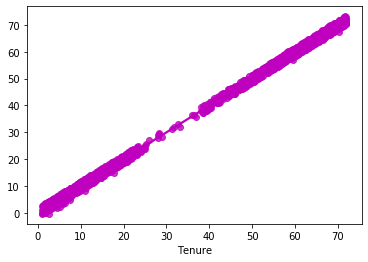

In [30]:
sns.regplot(x=y_test, y=predictions, ci=None, color="m")

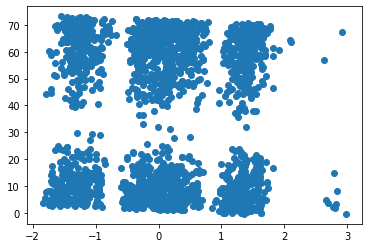

In [31]:
plt.scatter(residuals,predictions)

plt.show()

In [32]:
X_train = np.append (arr=np.ones([X_train.shape[0],1]).astype(int), values = X_train, axis = 1)

In [33]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Zip                   10000 non-null  int64  
 2   Lat                   10000 non-null  float64
 3   Lng                   10000 non-null  float64
 4   Population            10000 non-null  int64  
 5   Children              10000 non-null  int64  
 6   Age                   10000 non-null  int64  
 7   Income                10000 non-null  float64
 8   Marital               10000 non-null  int64  
 9   Gender                10000 non-null  int64  
 10  Outage_sec_perweek    10000 non-null  float64
 11  Email                 10000 non-null  int64  
 12  Contacts              10000 non-null  int64  
 13  Yearly_equip_failure  10000 non-null  int64  
 14  Techie                10000 non-null  int64  
 15  Contract            

In [34]:
import statsmodels.api as sm

In [35]:
X_opt = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38]
regressor = sm.OLS(y_train, X_train[:,X_opt]).fit()
print(regressor.summary())

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.486e+05
Date:                Tue, 31 Aug 2021   Prob (F-statistic):               0.00
Time:                        21:43:09   Log-Likelihood:                -11297.
No. Observations:                8000   AIC:                         2.267e+04
Df Residuals:                    7961   BIC:                         2.294e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.1339      0.193    -57.695      0.0

### Our OLS Model is successful in showing our P-values with our new method of creating dummy variables. We will consider this our new Initial Model. We can observe that our model is giving us and output r2 of 0.9986. This tells us that our model is accurate, the regplot shows us the residuals are falling along the prediciton line, this is good affirmation of the model as well. However when we look at the residual scatter plot we can see a discernable pattern. The residuals are grouped in 6 distinct groups, this could mean that the data is skewed or biased in some way, some of the input variables could be impacting each other. We will remedy this by checking for Multicollinearity. We will continue with a Correlation Matrix Heatmap, then Backwards Selection

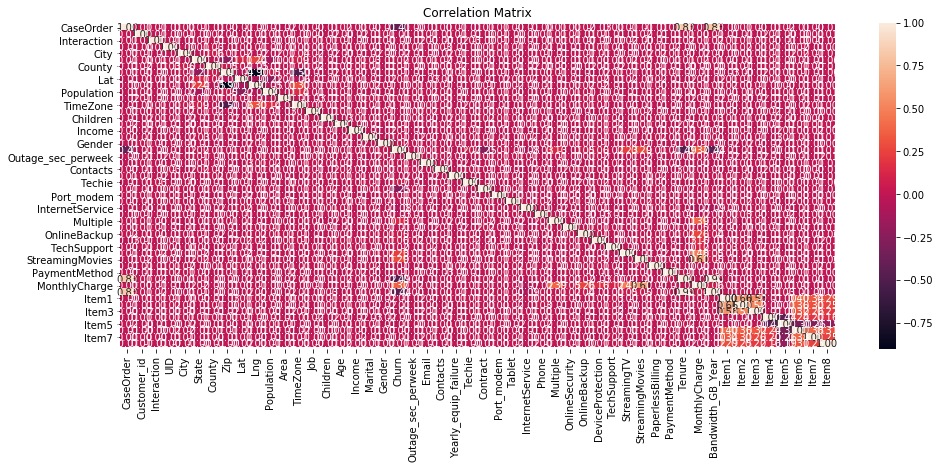

In [36]:
plt.figure(figsize=(16, 6))
ax = sns.heatmap(df_copy4.corr(), annot=True, fmt='.2f') # Plot of the correlation matrix
bottom, top = ax.get_ylim() # Figure limits
ax.set_ylim(bottom+0.3, top-0.3) # Setting figure limits
plt.title('Correlation Matrix') # Figure title
plt.show()

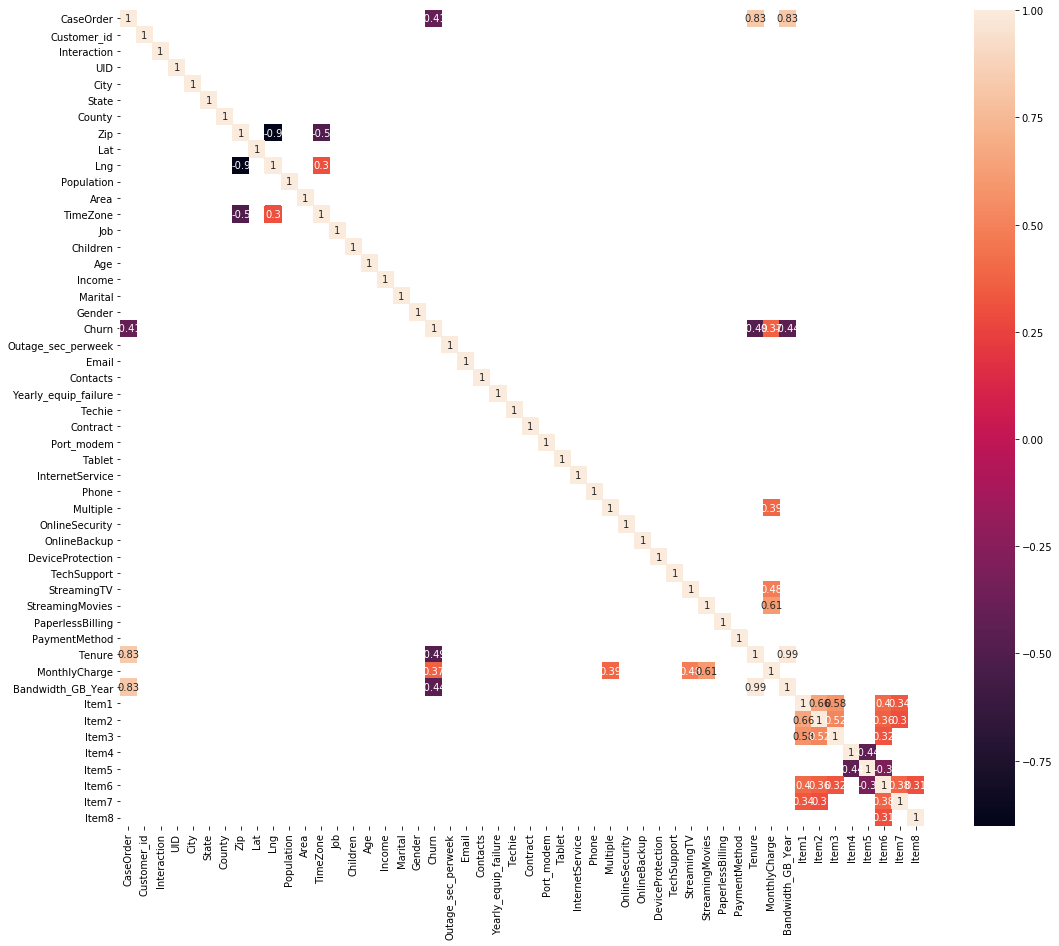

In [37]:
corr= df_copy4.corr() # Redifining the correlation matrix.
f,ax = plt.subplots(figsize=(18, 15)) # Set the figure size.
sns.heatmap(corr[(corr >= 0.30) | (corr <= -0.30)],
            annot=True); # Figure of the correlation matrix with variables removal

### We will drop Item7, Item1, Outages_sec_perweek,and StreamingMovies because they could cause possible Multicollinearity

# Backward Selection

#### We will Take all the variables with a P-Value above our significance level, .05,out of our dataframe. We will repeat this Process until there are only statistically significant variables left to optimize our Model

#### x37, x10, x26 dropped first

In [38]:
X_opt = [0,1,2,3,4,5,6,7,8,9,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,27,28,29,30,31,32,33,34,35,36,38]
regressor = sm.OLS(y_train, X_train[:,X_opt]).fit()
print(regressor.summary())

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 4.744e+04
Date:                Tue, 31 Aug 2021   Prob (F-statistic):               0.00
Time:                        21:43:27   Log-Likelihood:                -16181.
No. Observations:                8000   AIC:                         3.243e+04
Df Residuals:                    7964   BIC:                         3.269e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.1297      0.340    -15.093      0.0

## Final Backward Selection Model

In [39]:
X_opt = [0,1,6,7,19,22,23,24,25,27,28,30,31,32]
regressor = sm.OLS(y_train, X_train[:,X_opt]).fit()
print(regressor.summary())

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.278e+05
Date:                Tue, 31 Aug 2021   Prob (F-statistic):               0.00
Time:                        21:43:27   Log-Likelihood:                -16190.
No. Observations:                8000   AIC:                         3.241e+04
Df Residuals:                    7986   BIC:                         3.251e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.0853      0.139    -36.565      0.0

In [40]:
X=df_copy4.drop(["Tenure","Lat","Lng","Population","Children","Marital","Gender","Outage_sec_perweek","Email","Contacts","Yearly_equip_failure","Techie","Contract","Port_modem","Tablet","InternetService","Multiple","OnlineSecurity","StreamingMovies","MonthlyCharge","Item3","Item4","Item5","Item6","Item7","Item8"], axis=1)
Y=df["Tenure"]

In [41]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CaseOrder          10000 non-null  int64  
 1   Customer_id        10000 non-null  int64  
 2   Interaction        10000 non-null  int64  
 3   UID                10000 non-null  int64  
 4   City               10000 non-null  int64  
 5   State              10000 non-null  int64  
 6   County             10000 non-null  int64  
 7   Zip                10000 non-null  int64  
 8   Area               10000 non-null  int64  
 9   TimeZone           10000 non-null  int64  
 10  Job                10000 non-null  int64  
 11  Age                10000 non-null  int64  
 12  Income             10000 non-null  float64
 13  Churn              10000 non-null  int64  
 14  Phone              10000 non-null  int64  
 15  OnlineBackup       10000 non-null  int64  
 16  DeviceProtection   1000

#### After dropping the variables with a p-value above the 0.05 threshold we are left with the above 24 variables, they are a mixture of categorical and continious variabes. These will comprise our final model, this model should theoretically be the most accurate

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

In [43]:
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.score(X_test,y_test))

0.9891169893383468


In [44]:
predictions = lm.predict(X_test)
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
   # mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    #print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

regression_results(y_test, predictions)

explained_variance:  0.9891
r2:  0.9891
MAE:  2.2869
MSE:  7.5425
RMSE:  2.7464


In [45]:
residuals = y_test - predictions

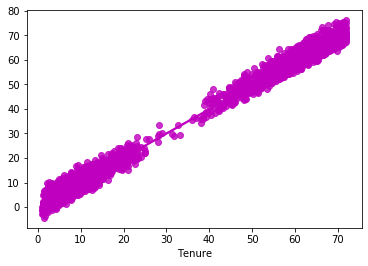

In [46]:
sns.regplot(x=y_test, y=predictions, ci=None, color="m")

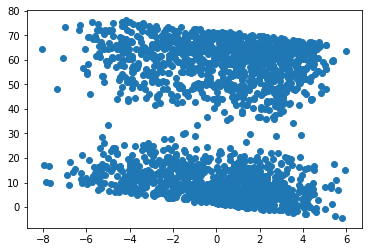

In [47]:
plt.scatter(residuals,predictions)

plt.show()

# Forward Selection

### We will start by dropping the same base variables as the backward selection models and the begin by only including the demographic variables. We will then determine which demographic variable should be included in our final reduced model.

In [48]:
X=df_copy5.drop(["Tenure","CaseOrder","Customer_id","Interaction","UID","Income","Churn","Outage_sec_perweek","Email","Contacts","Yearly_equip_failure","Techie","Port_modem","Contract","Tablet","InternetService","Phone","Multiple","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","PaperlessBilling","PaymentMethod","MonthlyCharge","Bandwidth_GB_Year","Item1","Item2","Item3","Item4","Item5","Item6","Item7","Item8"], axis=1)
Y=df["Tenure"]

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

In [50]:
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.score(X_test,y_test))

-0.002513173792250356


### We've Observed a negative R2 by exluding performance and technology metrics and only inculding demographic variables

In [51]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        10000 non-null  int64  
 1   State       10000 non-null  int64  
 2   County      10000 non-null  int64  
 3   Zip         10000 non-null  int64  
 4   Lat         10000 non-null  float64
 5   Lng         10000 non-null  float64
 6   Population  10000 non-null  int64  
 7   Area        10000 non-null  int64  
 8   TimeZone    10000 non-null  int64  
 9   Job         10000 non-null  int64  
 10  Children    10000 non-null  int64  
 11  Age         10000 non-null  int64  
 12  Marital     10000 non-null  int64  
 13  Gender      10000 non-null  int64  
dtypes: float64(2), int64(12)
memory usage: 1.1 MB


#### We will check to see which of these demographic variables is most important and retain only those for our final model. We must keep in mind that the dummy variables that wil drastically increase the number of variables wil not be beneficial to our model and we will not try to incorporate them. We wil intuitively choose the variables that we think are most beneficial and integral. From the above remaining variables we will test Income, Gender, Marital, and Population to see how they impact the model's R2

In [52]:
#### Dropping Income

In [53]:
X=df_copy5.drop(["Income","Tenure","CaseOrder","Customer_id","Interaction","UID","Income","Churn","Outage_sec_perweek","Email","Contacts","Yearly_equip_failure","Techie","Port_modem","Contract","Tablet","InternetService","Phone","Multiple","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","PaperlessBilling","PaymentMethod","MonthlyCharge","Bandwidth_GB_Year","Item1","Item2","Item3","Item4","Item5","Item6","Item7","Item8"], axis=1)
Y=df["Tenure"]

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

In [55]:
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.score(X_test,y_test))

-0.002513173792250356


#### No impact

#### Dropping Gender

In [56]:
X=df_copy5.drop(["Gender","Income","Tenure","CaseOrder","Customer_id","Interaction","UID","Income","Churn","Outage_sec_perweek","Email","Contacts","Yearly_equip_failure","Techie","Port_modem","Contract","Tablet","InternetService","Phone","Multiple","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","PaperlessBilling","PaymentMethod","MonthlyCharge","Bandwidth_GB_Year","Item1","Item2","Item3","Item4","Item5","Item6","Item7","Item8"], axis=1)
Y=df["Tenure"]

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

In [58]:
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.score(X_test,y_test))

-0.0029906807478796704


#### Dropping Gender decreased our score by .0004, we will consider it significant

In [59]:
#### Dropping Marital and Population

In [60]:
X=df_copy5.drop(["Marital","Population","Gender","Income","Tenure","CaseOrder","Customer_id","Interaction","UID","Income","Churn","Outage_sec_perweek","Email","Contacts","Yearly_equip_failure","Techie","Port_modem","Contract","Tablet","InternetService","Phone","Multiple","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","PaperlessBilling","PaymentMethod","MonthlyCharge","Bandwidth_GB_Year","Item1","Item2","Item3","Item4","Item5","Item6","Item7","Item8"], axis=1)
Y=df["Tenure"]

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

In [62]:
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.score(X_test,y_test))

-0.002294580726309059


#### Dropping these variables increased our R2, we will exlude them from the Final Model

### We have concluded that out of all the Demographic variables We will include Gender, there is a possibility that Income can tie into other predictor variables and another combination of variables in the final model. We will intuitively decide to keep income in our final model

## We will now test the performance metrics in forward selection fashion to determine which of these variables are significant enough to include in our Final Model. We will start with our base drop statement from our backwards selection and move forward from there.

#### We will intuitively choose performance metric variables and test them for impact in our regression model. We will choose InternetService,Multiple,OnlineSecurit, OnlineBackup, DeviceProtection, StreamingTV, StreamingMovies, MonthlyCharge, Bandwidth_GB_Year, and the Items. We will exclude a few of the items to decrease possibilty of multicollinearity that we observed could be possible from our Correlation Matrix Heatmap

#### Dropping InternetService

In [63]:
X=df_copy6.drop(["InternetService","Tenure","Interaction","Customer_id","UID","Area","Job","City","County","TimeZone","State","Churn"], axis=1)
Y=df["Tenure"]

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

In [65]:
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.score(X_test,y_test))

0.9920579404425306


#### has negative impact when not included in model when compared to initial backward selection model, has a difference of .005, we will include in our final model

#### Dropping Mulitple

In [66]:
X=df_copy6.drop(["Multiple","InternetService","Tenure","Interaction","Customer_id","UID","Area","Job","City","County","TimeZone","State","Churn"], axis=1)
Y=df["Tenure"]

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

In [68]:
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.score(X_test,y_test))

0.9914289068373454


#### Has an impact, we will include in final model

#### Droppoing Online Security

In [69]:
X=df_copy6.drop(["OnlineSecurity","Multiple","InternetService","Tenure","Interaction","Customer_id","UID","Area","Job","City","County","TimeZone","State","Churn"], axis=1)
Y=df["Tenure"]

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

In [71]:
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.score(X_test,y_test))

0.9912530574260171


#### Has an impact, we will include in final model

#### Dropping OnlineBackup

In [72]:
X=df_copy6.drop(["OnlineBackup","OnlineSecurity","Multiple","InternetService","Tenure","Interaction","Customer_id","UID","Area","Job","City","County","TimeZone","State","Churn"], axis=1)
Y=df["Tenure"]

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

In [74]:
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.score(X_test,y_test))

0.9908223077207488


#### Has an impact, we will include in final model

#### Dropping DeviceProtection

In [75]:
X=df_copy6.drop(["DeviceProtection","OnlineBackup","OnlineSecurity","Multiple","InternetService","Tenure","Interaction","Customer_id","UID","Area","Job","City","County","TimeZone","State","Churn"], axis=1)
Y=df["Tenure"]

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

In [77]:
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.score(X_test,y_test))

0.9905373494469566


#### Has an impact, we will include in final model

#### Dropping StreamingTV and StreamingMovies

In [78]:
X=df_copy6.drop(["StreamingTV","StreamingMovies","DeviceProtection","OnlineBackup","OnlineSecurity","Multiple","InternetService","Tenure","Interaction","Customer_id","UID","Area","Job","City","County","TimeZone","State","Churn"], axis=1)
Y=df["Tenure"]

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

In [80]:
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.score(X_test,y_test))

0.9894164863525595


#### Has an impact, we will include in final model

#### Dropping MonthlyCharge

In [81]:
X=df_copy6.drop(["MonthlyCharge","StreamingTV","StreamingMovies","DeviceProtection","OnlineBackup","OnlineSecurity","Multiple","InternetService","Tenure","Interaction","Customer_id","UID","Area","Job","City","County","TimeZone","State","Churn"], axis=1)
Y=df["Tenure"]

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

In [83]:
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.score(X_test,y_test))

0.9855446518038253


#### Has an impact, we will include in final model

#### Dropping Bandwidth_GB_Year

In [84]:
X=df_copy6.drop(["Bandwidth_GB_Year","MonthlyCharge","StreamingTV","StreamingMovies","DeviceProtection","OnlineBackup","OnlineSecurity","Multiple","InternetService","Tenure","Interaction","Customer_id","UID","Area","Job","City","County","TimeZone","State","Churn"], axis=1)
Y=df["Tenure"]

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

In [86]:
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.score(X_test,y_test))

0.6900707021439811


#### Has the most significant impact out of all variables in our Model Feature selection. We will definitely include in our final model

#### Dropping Item2-5 and Item7, We believe Items1 and Item7 can cause Multicollinearity

In [87]:
X=df_copy6.drop(["Item2","Item3","Item4","Item5","Bandwidth_GB_Year","MonthlyCharge","StreamingTV","StreamingMovies","DeviceProtection","OnlineBackup","OnlineSecurity","Multiple","InternetService","Tenure","Interaction","Customer_id","UID","Area","Job","City","County","TimeZone","State","Churn"], axis=1)
Y=df["Tenure"]

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

In [89]:
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.score(X_test,y_test))

0.6900279546048143


#### Has an impact, we will include in final model

# Final Model with Forward Selected Variables

In [90]:
X=df.drop(["Tenure","Interaction","Customer_id","UID","Area","Job","City","County","TimeZone","State","Churn","CaseOrder","Zip","Lng","Lat","Population","Children","Age","CaseOrder","Zip","Lat","Lng","Population","Children","Age","Marital","Outage_sec_perweek","Email","Contacts","Yearly_equip_failure","Techie","Port_modem","Tablet","Phone","TechSupport","PaperlessBilling","PaymentMethod","Item1","Item6","Item8"], axis=1)
Y=df["Tenure"]

In [91]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Income             10000 non-null  float64
 1   Gender             10000 non-null  int64  
 2   Contract           10000 non-null  int64  
 3   InternetService    10000 non-null  int64  
 4   Multiple           10000 non-null  int64  
 5   OnlineSecurity     10000 non-null  int64  
 6   OnlineBackup       10000 non-null  int64  
 7   DeviceProtection   10000 non-null  int64  
 8   StreamingTV        10000 non-null  int64  
 9   StreamingMovies    10000 non-null  int64  
 10  MonthlyCharge      10000 non-null  float64
 11  Bandwidth_GB_Year  10000 non-null  float64
 12  Item2              10000 non-null  int64  
 13  Item3              10000 non-null  int64  
 14  Item4              10000 non-null  int64  
 15  Item5              10000 non-null  int64  
 16  Item7              1000

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

In [93]:
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.score(X_test,y_test))

0.9965911011759179


In [94]:
predictions = lm.predict(X_test)
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
   # mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    #print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

regression_results(y_test, predictions)

explained_variance:  0.9966
r2:  0.9966
MAE:  1.2319
MSE:  2.3625
RMSE:  1.5371


In [95]:
residuals = y_test - predictions

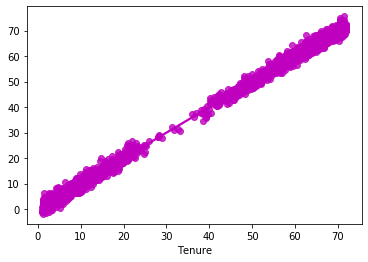

In [96]:
sns.regplot(x=y_test, y=predictions, ci=None, color="m")

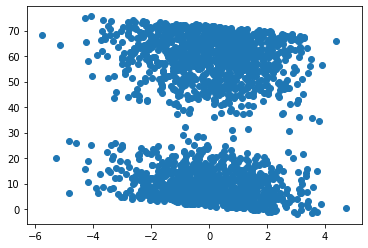

In [97]:
plt.scatter(residuals,predictions)

plt.show()

# Final Backward and Forward Selection Model Comparison

### Initial Backward Model

In [98]:
X=df_copy3.drop(["Tenure","Interaction","Customer_id","UID","Area","Job","City","County","TimeZone","State","Churn"], axis=1)
Y=df["Tenure"]

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

In [100]:
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.score(X_test,y_test))

0.9986063818158079


In [101]:
predictions = lm.predict(X_test)
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
   # mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    #print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

regression_results(y_test, predictions)

explained_variance:  0.9986
r2:  0.9986
MAE:  0.8007
MSE:  0.9659
RMSE:  0.9828


In [102]:
residuals = y_test - predictions

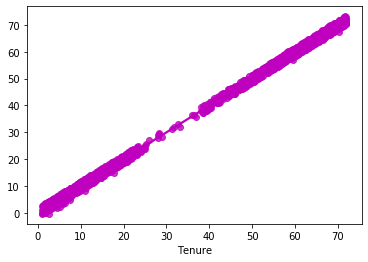

In [103]:
sns.regplot(x=y_test, y=predictions, ci=None, color="m")

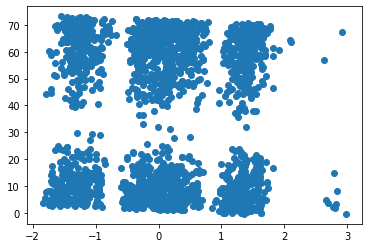

In [104]:
plt.scatter(residuals,predictions)

plt.show()

### Final Backward Model

In [105]:
X=df_copy4.drop(["Tenure","Lat","Lng","Population","Children","Marital","Gender","Outage_sec_perweek","Email","Contacts","Yearly_equip_failure","Techie","Contract","Port_modem","Tablet","InternetService","Multiple","OnlineSecurity","StreamingMovies","MonthlyCharge","Item3","Item4","Item5","Item6","Item7","Item8"], axis=1)
Y=df["Tenure"]

In [106]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CaseOrder          10000 non-null  int64  
 1   Customer_id        10000 non-null  int64  
 2   Interaction        10000 non-null  int64  
 3   UID                10000 non-null  int64  
 4   City               10000 non-null  int64  
 5   State              10000 non-null  int64  
 6   County             10000 non-null  int64  
 7   Zip                10000 non-null  int64  
 8   Area               10000 non-null  int64  
 9   TimeZone           10000 non-null  int64  
 10  Job                10000 non-null  int64  
 11  Age                10000 non-null  int64  
 12  Income             10000 non-null  float64
 13  Churn              10000 non-null  int64  
 14  Phone              10000 non-null  int64  
 15  OnlineBackup       10000 non-null  int64  
 16  DeviceProtection   1000

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

In [108]:
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.score(X_test,y_test))

0.9891169893383468


In [109]:
predictions = lm.predict(X_test)
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
   # mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    #print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

regression_results(y_test, predictions)

explained_variance:  0.9891
r2:  0.9891
MAE:  2.2869
MSE:  7.5425
RMSE:  2.7464


In [110]:
residuals = y_test - predictions

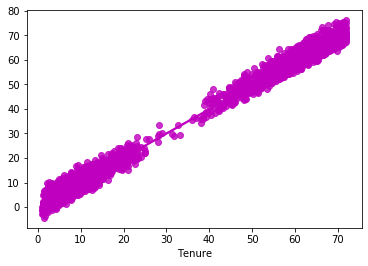

In [111]:
sns.regplot(x=y_test, y=predictions, ci=None, color="m")

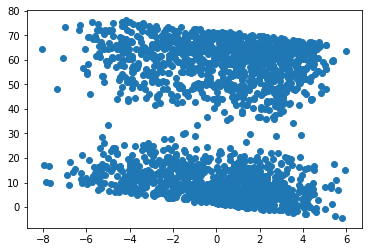

In [112]:
plt.scatter(residuals,predictions)

plt.show()

### Forward Model

In [113]:
X=df_copy7.drop(["Tenure","Interaction","Customer_id","UID","Area","Job","City","County","TimeZone","State","Churn","CaseOrder","Zip","Lng","Lat","Population","Children","Age","CaseOrder","Zip","Lat","Lng","Population","Children","Age","Marital","Outage_sec_perweek","Email","Contacts","Yearly_equip_failure","Techie","Port_modem","Tablet","Phone","TechSupport","PaperlessBilling","PaymentMethod","Item1","Item6","Item8"], axis=1)
Y=df["Tenure"]

In [114]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Income             10000 non-null  float64
 1   Gender             10000 non-null  int64  
 2   Contract           10000 non-null  int64  
 3   InternetService    10000 non-null  int64  
 4   Multiple           10000 non-null  int64  
 5   OnlineSecurity     10000 non-null  int64  
 6   OnlineBackup       10000 non-null  int64  
 7   DeviceProtection   10000 non-null  int64  
 8   StreamingTV        10000 non-null  int64  
 9   StreamingMovies    10000 non-null  int64  
 10  MonthlyCharge      10000 non-null  float64
 11  Bandwidth_GB_Year  10000 non-null  float64
 12  Item2              10000 non-null  int64  
 13  Item3              10000 non-null  int64  
 14  Item4              10000 non-null  int64  
 15  Item5              10000 non-null  int64  
 16  Item7              1000

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

In [116]:
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.score(X_test,y_test))

0.9965911011759179


In [117]:
predictions = lm.predict(X_test)
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
   # mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    #print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

regression_results(y_test, predictions)

explained_variance:  0.9966
r2:  0.9966
MAE:  1.2319
MSE:  2.3625
RMSE:  1.5371


In [118]:
residuals = y_test - predictions

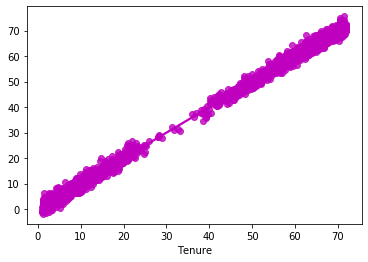

In [119]:
sns.regplot(x=y_test, y=predictions, ci=None, color="m")

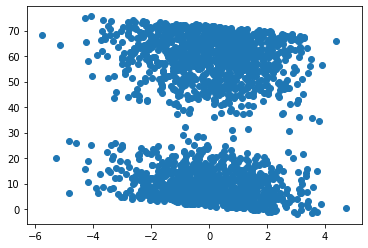

In [120]:
plt.scatter(residuals,predictions)

plt.show()

In [121]:
print(lm.coef_, lm.intercept_)

[-7.17686697e-07 -5.82600576e-01 -2.45889687e-02  2.97045812e+00
 -2.35260583e+00 -1.09786603e+00 -2.17154894e+00 -1.60262016e+00
 -4.74865031e+00 -4.99956239e+00  4.71027134e-02  1.21764063e-02
 -3.55432067e-04 -6.62759677e-03  2.44849274e-02 -3.60619790e-03
 -2.38043125e-03] -9.246391167714258


In [122]:
print("Intercept: ", lm.intercept_)
print("Coefficients:")
list(zip(X, lm.coef_))

Intercept:  -9.246391167714258
Coefficients:


[('Income', -7.176866971400995e-07),
 ('Gender', -0.582600576431083),
 ('Contract', -0.024588968737316752),
 ('InternetService', 2.9704581221687603),
 ('Multiple', -2.352605828379221),
 ('OnlineSecurity', -1.0978660256712438),
 ('OnlineBackup', -2.1715489405226625),
 ('DeviceProtection', -1.6026201642220461),
 ('StreamingTV', -4.748650312242773),
 ('StreamingMovies', -4.999562393357259),
 ('MonthlyCharge', 0.04710271336936262),
 ('Bandwidth_GB_Year', 0.01217640634538193),
 ('Item2', -0.00035543206676477603),
 ('Item3', -0.00662759676793848),
 ('Item4', 0.02448492736723005),
 ('Item5', -0.0036061979040460193),
 ('Item7', -0.002380431245633076)]

 #### We write the Multiple Linear Regression Equation as follows

 Tenure = -9.2464 - (-7.1768e07 * Income)-(-0.5826 * Gender)-(-0.0245 * Contract)-
 (2.9704 * InternetService)-(-2.3526 * Mulitple)-(-1.0978 * OnlineSecurity)-(-2.1715 * OnlineBackup)-
 (-1.6026 * DeviceProtection)-(-4.7486 * StreamingTV)-(-4.7486 * StreamingMovies)-
 ( 0.0471 * MonthlyCharge)-(0.0121 * Bandwidth_GB_Year)-(-0.0003 * Item2)-
 (-0.0066 * Item3)-(0.0244 * Item4)-(-0.0036 * Item5)- (-0.0023 * Item7)

## Comparison of Initial Backward Selection Model, Final Backward Selection Model, and Final Forward Selection Model

#### Our initial backward selection model had a higher R2 and lower MAE, MSE, and RMSE. Taking this consideration it also had some discernable patterns in the residual scatterplot, taking away from the integrity of the model, as the predictor variables might bet correlated. The points however did fall tighter on the prediction line in the reg plot when compared to our final backward selection model. The Final forward selection model was created to remedy these issues and gain greater insight. In our final forward model we can observe a higher R2 at .9966, when compared to the final backward model. This model also has a tighter fit on the reg plot prediction line than the previous models, and also has no discernable patterns within the residual scatterplot. The Final Forward Model is the most Accurate and Reliable Model


#### In linear regression, coefficients are the values that multiply the predictor values. The sign of each coefficient indicates the direction of the relationship between a predictor variable and the response variable. A positive sign indicates that as the predictor variable increases, the response variable also increases. This is significant because we can see what variables have the strongest correlation. In this case we can observe that InternetService, MonthlyCharge, and Bandwidth have the highest values. Our forward selection process revealed that Bandwidth_GB_Year had the most significant impact on Tenure, we can also see that pattern reveal itself in Correlation Matrix. We also see now that even though backward selection was successful for feature selection it did not necessarily give us the insight about the input variables, only the desired result, that is one drawback about utilizing only one selection method.  

#### The aformentioned variables can be taken into consideration when creating future packages, or when determining where to allocate resources for the company to make a return on investment. If the Y value, Tenure, is responsive to these variables. We can increase Tenure by working with and around these variables. 


#### A limitation of Multiple Linear Regression is the quality of the data and the uniqueness of it. We reduced our data with a correlation matrix but it is still hard to determine with certainty whether the independent variables are connected in some way. We are equiped with our understanding of the uniqueness of the data, and further investigation is required to determine if the data in correlated in ways that we did not quite frame for the question at hand. Another limitation is that the quality of the input variables determine the quality of the results. Our most significant variable is Bandwidth_GB_Year, other performance metrics are impactful but do not come close. The model relies heavily on this one metric and that takes away from the integrity of the model.

## Final Dataset

In [123]:
df.drop(["Tenure","Interaction","Customer_id","UID","Area","Job","City","County","TimeZone","State","Churn","CaseOrder","Zip","Lng","Lat","Population","Children","Age","CaseOrder","Zip","Lat","Lng","Population","Children","Age","Marital","Outage_sec_perweek","Email","Contacts","Yearly_equip_failure","Techie","Port_modem","Tablet","Phone","TechSupport","PaperlessBilling","PaymentMethod","Item1","Item6","Item8"],axis=1, inplace=True)

### Final Dataset df

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Income             10000 non-null  float64
 1   Gender             10000 non-null  int64  
 2   Contract           10000 non-null  int64  
 3   InternetService    10000 non-null  int64  
 4   Multiple           10000 non-null  int64  
 5   OnlineSecurity     10000 non-null  int64  
 6   OnlineBackup       10000 non-null  int64  
 7   DeviceProtection   10000 non-null  int64  
 8   StreamingTV        10000 non-null  int64  
 9   StreamingMovies    10000 non-null  int64  
 10  MonthlyCharge      10000 non-null  float64
 11  Bandwidth_GB_Year  10000 non-null  float64
 12  Item2              10000 non-null  int64  
 13  Item3              10000 non-null  int64  
 14  Item4              10000 non-null  int64  
 15  Item5              10000 non-null  int64  
 16  Item7              1000

In [128]:
df.to_csv('Final_Regression_DataSet.csv')

In [131]:
Final_DataSet = pd.read_csv('Final_Regression_Dataset')

In [132]:
Final_DataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         10000 non-null  int64  
 1   Income             10000 non-null  float64
 2   Gender             10000 non-null  int64  
 3   Contract           10000 non-null  int64  
 4   InternetService    10000 non-null  int64  
 5   Multiple           10000 non-null  int64  
 6   OnlineSecurity     10000 non-null  int64  
 7   OnlineBackup       10000 non-null  int64  
 8   DeviceProtection   10000 non-null  int64  
 9   StreamingTV        10000 non-null  int64  
 10  StreamingMovies    10000 non-null  int64  
 11  MonthlyCharge      10000 non-null  float64
 12  Bandwidth_GB_Year  10000 non-null  float64
 13  Item2              10000 non-null  int64  
 14  Item3              10000 non-null  int64  
 15  Item4              10000 non-null  int64  
 16  Item5              1000

### Copy of Dataset- Final_Regression_Dataset.csv